In [12]:
pwd

'C:\\Users\\이동환\\Desktop'

In [1]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프 문자 깨지는 대처
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df_r= pd.read_excel('soft_review.xlsx')
df_r.review

0             핑크로즈는 언제나 좋아요.
1         바로 교환처리해 주셔서 좋았어요.
2             항상 구매하는 제품 입니다
3         좋습니다. 좋습니다. 맛있습니다.
4       자주 애용하고 있어요~또 구매할께요.
                ...         
1503           향이좋아요 아이가좋아해요
1504             1년치를 다 샀어요~
1505           저렴한 가격 아주 좋아요
1506           저렴한 가격 아주 좋아요
1507           저렴한 가격 아주 좋아요
Name: review, Length: 1508, dtype: object

In [3]:
print(df_r.shape)
df_r.head(5)

(1508, 2)


,Unnamed: 0,review
0,0,핑크로즈는 언제나 좋아요.
1,1,바로 교환처리해 주셔서 좋았어요.
2,2,항상 구매하는 제품 입니다
3,3,좋습니다. 좋습니다. 맛있습니다.
4,4,자주 애용하고 있어요~또 구매할께요.


## 워드클라우드 해보기

In [4]:
df_r = pd.read_excel('soft_review.xlsx')

In [5]:
print(df_r.shape)
print(df_r.review)

(1508, 2)
0             핑크로즈는 언제나 좋아요.
1         바로 교환처리해 주셔서 좋았어요.
2             항상 구매하는 제품 입니다
3         좋습니다. 좋습니다. 맛있습니다.
4       자주 애용하고 있어요~또 구매할께요.
                ...         
1503           향이좋아요 아이가좋아해요
1504             1년치를 다 샀어요~
1505           저렴한 가격 아주 좋아요
1506           저렴한 가격 아주 좋아요
1507           저렴한 가격 아주 좋아요
Name: review, Length: 1508, dtype: object


In [6]:
content_list = df_r.review.values.tolist()

In [7]:
content_list

['핑크로즈는 언제나 좋아요.',
 '바로 교환처리해 주셔서 좋았어요.',
 '항상 구매하는 제품 입니다',
 '좋습니다. 좋습니다. 맛있습니다.',
 '자주 애용하고 있어요~또 구매할께요.',
 '핑크로즈는 언제나 좋아요.',
 '바로 교환처리해 주셔서 좋았어요.',
 '항상 구매하는 제품 입니다',
 '좋습니다. 좋습니다. 맛있습니다.',
 '자주 애용하고 있어요~또 구매할께요.',
 '배송이 빨라 좋아요',
 '향이 진하지가 않아요',
 '바로배송 편리해서 넘 조아요~',
 '할인해서 싸게 잘 샀어요',
 '세일해서 저렴한 가격에 샀어요',
 '저렴해서 구매했어요~~~~~~ 괜찮아요',
 '가격대비 양도 많고 좋아요. 향도 은은하니 좋네요',
 '제품의 양도 많고 좋은것 같습니다.',
 '가격 저렴하고 큰 용량입니다',
 '향이 좋아서 즐겨쓴 제품이예요. 앞으로도 계속 구매 에정',
 '세일해서 잘 샀어요',
 '저렴하게 잘 사서 좋아요.',
 '좋습니다 ㅋ\n좋습니다 ㅋ',
 '향도좋고 가격도 대만족입니다\n진인게 추천하고 싶어요',
 '배송이 빨라서 좋아요',
 '향이 좋아 계속 사용하는 제품이에요',
 '향기도 적당하고 가격대비 양도 많구 좋아요',
 '배송도 빠르고 좋아요',
 '늘 구매합니다. 좋아요.',
 '잘 받았어요\n감사합니다',
 '대용량이라 넉넉해요. 향 좋아요',
 '로즈향 좋아해서 구매합니다.',
 '즐겨 구매하는데 항상 만족해요',
 '즐겨 구매하는데 항상 만족해요',
 '향도 좋고 맘에 들어요~',
 '사용해보니 좋아요 ~',
 '역시 빠름빠름 믿고 사는 롯데마트배송 짱이에요',
 '쓰던제품이라 구매해요.\n큰 용량은 첨인데 크네요.',
 '항상 구매하는 제품입니다',
 '좋아요좋아요좋아요좋아요',
 '피존인데 세일때 쟁겨 놓은게 진리죠',
 '제일 좋아하는 향ㅎ',
 '무거운데 집앞까지 배송해주셔서 감사합니다',
 '항상 쓰는제품입니다 좋아요',
 '롯데마트상품은 정ㅁᆢㄹ 좋아요ㅎ',
 '행사할 때 저렴하게 샀어요~',
 '피

In [8]:
len(content_list)

1508

In [9]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [10]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [11]:
content_text = ''

for each_line in content_list:
    content_text = content_text + each_line + '\n'

In [12]:
content_text

'핑크로즈는 언제나 좋아요.\n바로 교환처리해 주셔서 좋았어요.\n항상 구매하는 제품 입니다\n좋습니다. 좋습니다. 맛있습니다.\n자주 애용하고 있어요~또 구매할께요.\n핑크로즈는 언제나 좋아요.\n바로 교환처리해 주셔서 좋았어요.\n항상 구매하는 제품 입니다\n좋습니다. 좋습니다. 맛있습니다.\n자주 애용하고 있어요~또 구매할께요.\n배송이 빨라 좋아요\n향이 진하지가 않아요\n바로배송 편리해서 넘 조아요~\n할인해서 싸게 잘 샀어요\n세일해서 저렴한 가격에 샀어요\n저렴해서 구매했어요~~~~~~ 괜찮아요\n가격대비 양도 많고 좋아요. 향도 은은하니 좋네요\n제품의 양도 많고 좋은것 같습니다.\n가격 저렴하고 큰 용량입니다\n향이 좋아서 즐겨쓴 제품이예요. 앞으로도 계속 구매 에정\n세일해서 잘 샀어요\n저렴하게 잘 사서 좋아요.\n좋습니다 ㅋ\n좋습니다 ㅋ\n향도좋고 가격도 대만족입니다\n진인게 추천하고 싶어요\n배송이 빨라서 좋아요\n향이 좋아 계속 사용하는 제품이에요\n향기도 적당하고 가격대비 양도 많구 좋아요\n배송도 빠르고 좋아요\n늘 구매합니다. 좋아요.\n잘 받았어요\n감사합니다\n대용량이라 넉넉해요. 향 좋아요\n로즈향 좋아해서 구매합니다.\n즐겨 구매하는데 항상 만족해요\n즐겨 구매하는데 항상 만족해요\n향도 좋고 맘에 들어요~\n사용해보니 좋아요 ~\n역시 빠름빠름 믿고 사는 롯데마트배송 짱이에요\n쓰던제품이라 구매해요.\n큰 용량은 첨인데 크네요.\n항상 구매하는 제품입니다\n좋아요좋아요좋아요좋아요\n피존인데 세일때 쟁겨 놓은게 진리죠\n제일 좋아하는 향ㅎ\n무거운데 집앞까지 배송해주셔서 감사합니다\n항상 쓰는제품입니다 좋아요\n롯데마트상품은 정ㅁᆢㄹ 좋아요ㅎ\n행사할 때 저렴하게 샀어요~\n피존만 쓰고 있어요.\n저렴한가격에 만족합니다\n빨래엔 피죠~~~~\n빠른 배송 감사합니다^^\n잘 받았습니다. ...\n배송이쿠팡에비해만족스럽지않고\n\n어플이용(주문방법.배송묶음,배송비누적오류.등등이용에불편이많음)에있어서도 쿠팡보다못하다. 결론쿠팡

## 2000개의 문장에서 형태소분석을 마친 단어로 만든 token_ko

In [14]:
tokens_ko = t.nouns(content_text)
tokens_ko

['핑크',
 '즈',
 '바로',
 '교환',
 '처리',
 '해',
 '항상',
 '구매',
 '제품',
 '자주',
 '애용',
 '또',
 '구매',
 '핑크',
 '즈',
 '바로',
 '교환',
 '처리',
 '해',
 '항상',
 '구매',
 '제품',
 '자주',
 '애용',
 '또',
 '구매',
 '배송',
 '향',
 '바로',
 '배송',
 '할인',
 '일해',
 '가격',
 '구매',
 '가격',
 '대비',
 '양도',
 '향',
 '제품',
 '양도',
 '것',
 '가격',
 '용량',
 '향',
 '제품',
 '앞',
 '계속',
 '구매',
 '정',
 '일해',
 '사서',
 '향',
 '가격',
 '만족',
 '진인',
 '추천',
 '배송',
 '빨',
 '향',
 '계속',
 '사용',
 '제품',
 '향기도',
 '가격',
 '대비',
 '양도',
 '배송',
 '늘',
 '구매',
 '용량',
 '향',
 '로',
 '향',
 '구매',
 '구매',
 '항상',
 '구매',
 '항상',
 '향',
 '맘',
 '사용',
 '역시',
 '롯데',
 '마트',
 '배송',
 '짱',
 '제품',
 '구매',
 '용량',
 '첨',
 '항상',
 '구매',
 '제품',
 '피존',
 '때',
 '쟁겨',
 '은',
 '진리',
 '제일',
 '향',
 '집앞',
 '배송',
 '항상',
 '제품',
 '롯데',
 '마트',
 '상품',
 '정',
 '행사',
 '때',
 '피존',
 '가격',
 '빨래',
 '피',
 '배송',
 '배송',
 '쿠팡',
 '만족',
 '어플',
 '이용',
 '주문',
 '방법',
 '배송',
 '묶음',
 '배송비',
 '누적',
 '오류',
 '등등',
 '이용',
 '불편',
 '쿠팡',
 '결론',
 '쿠팡',
 '가격',
 '혜택',
 '쿠팡',
 '어플',
 '이용',
 '리뷰',
 '쓰기',
 '상품',
 '식',
 '전체',
 '문제',
 '접속',
 '오류',
 '항상',

In [15]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

4002
658


In [16]:
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('향', 315),
 ('배송', 179),
 ('피죤', 163),
 ('가격', 129),
 ('구매', 128),
 ('제품', 106),
 ('구입', 80),
 ('사용', 76),
 ('항상', 75),
 ('할인', 72),
 ('행사', 72),
 ('것', 64),
 ('상품', 57),
 ('늘', 56),
 ('빨', 54),
 ('핑크', 51),
 ('유연제', 48),
 ('섬유', 43),
 ('향기', 43),
 ('자주', 41),
 ('때', 41),
 ('빨래', 34),
 ('주문', 33),
 ('애용', 28),
 ('이', 28),
 ('추천', 27),
 ('품질', 27),
 ('냄새', 27),
 ('양도', 26),
 ('피존', 26),
 ('시', 26),
 ('용량', 25),
 ('일해', 24),
 ('대비', 24),
 ('작성', 23),
 ('용기', 23),
 ('요조', 22),
 ('하나', 22),
 ('최소', 22),
 ('자', 22),
 ('이상', 22),
 ('등록', 22),
 ('역시', 21),
 ('마트', 21),
 ('정말', 21),
 ('반값', 20),
 ('적극', 20),
 ('거', 19),
 ('무난', 18),
 ('주로', 18),
 ('요', 17),
 ('아주', 17),
 ('향기도', 16),
 ('롯데', 16),
 ('더', 16),
 ('차라리', 16),
 ('팔면', 16),
 ('제일', 15),
 ('이용', 15),
 ('해', 14),
 ('만족', 14),
 ('맘', 14),
 ('매번', 14),
 ('젤', 14),
 ('집', 12),
 ('일', 12),
 ('또', 11),
 ('좀', 11),
 ('개', 11),
 ('기사', 11),
 ('물건', 10),
 ('생각', 10),
 ('포장', 10),
 ('세탁', 10),
 ('가성', 10),
 ('최고', 10),
 ('사서', 9),
 ('그냥', 9)

In [17]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.','가',"!",'\r\n\r\n','\r\n','\n','\n ','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('향', 315),
 ('배송', 179),
 ('피죤', 163),
 ('가격', 129),
 ('구매', 128),
 ('제품', 106),
 ('구입', 80),
 ('사용', 76),
 ('항상', 75),
 ('할인', 72),
 ('행사', 72),
 ('상품', 57),
 ('늘', 56),
 ('빨', 54),
 ('핑크', 51),
 ('유연제', 48),
 ('섬유', 43),
 ('향기', 43),
 ('자주', 41),
 ('빨래', 34),
 ('주문', 33),
 ('애용', 28),
 ('추천', 27),
 ('품질', 27),
 ('냄새', 27),
 ('양도', 26),
 ('피존', 26),
 ('시', 26),
 ('용량', 25),
 ('일해', 24),
 ('대비', 24),
 ('작성', 23),
 ('용기', 23),
 ('요조', 22),
 ('최소', 22),
 ('자', 22),
 ('등록', 22),
 ('역시', 21),
 ('마트', 21),
 ('정말', 21),
 ('반값', 20),
 ('적극', 20),
 ('무난', 18),
 ('주로', 18),
 ('아주', 17),
 ('향기도', 16),
 ('롯데', 16),
 ('더', 16),
 ('차라리', 16),
 ('팔면', 16)]

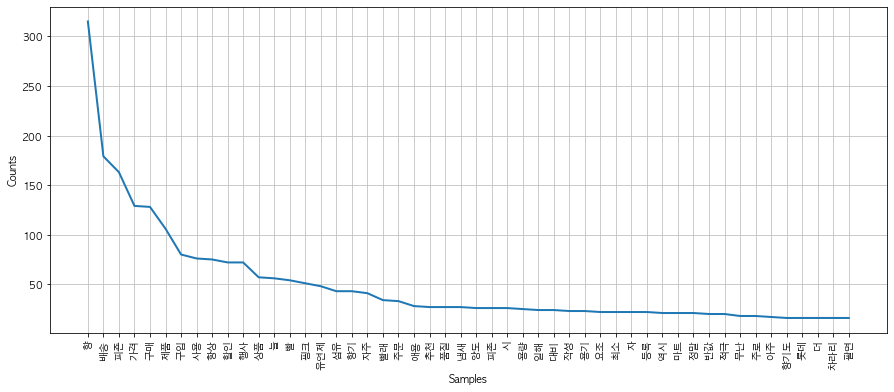

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz


plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [21]:
data = ko.vocab().most_common(300)
data

[('향', 315),
 ('배송', 179),
 ('피죤', 163),
 ('가격', 129),
 ('구매', 128),
 ('제품', 106),
 ('구입', 80),
 ('사용', 76),
 ('항상', 75),
 ('할인', 72),
 ('행사', 72),
 ('상품', 57),
 ('늘', 56),
 ('빨', 54),
 ('핑크', 51),
 ('유연제', 48),
 ('섬유', 43),
 ('향기', 43),
 ('자주', 41),
 ('빨래', 34),
 ('주문', 33),
 ('애용', 28),
 ('추천', 27),
 ('품질', 27),
 ('냄새', 27),
 ('양도', 26),
 ('피존', 26),
 ('시', 26),
 ('용량', 25),
 ('일해', 24),
 ('대비', 24),
 ('작성', 23),
 ('용기', 23),
 ('요조', 22),
 ('최소', 22),
 ('자', 22),
 ('등록', 22),
 ('역시', 21),
 ('마트', 21),
 ('정말', 21),
 ('반값', 20),
 ('적극', 20),
 ('무난', 18),
 ('주로', 18),
 ('아주', 17),
 ('향기도', 16),
 ('롯데', 16),
 ('더', 16),
 ('차라리', 16),
 ('팔면', 16),
 ('제일', 15),
 ('이용', 15),
 ('해', 14),
 ('만족', 14),
 ('맘', 14),
 ('매번', 14),
 ('젤', 14),
 ('집', 12),
 ('또', 11),
 ('개', 11),
 ('기사', 11),
 ('물건', 10),
 ('생각', 10),
 ('포장', 10),
 ('세탁', 10),
 ('가성', 10),
 ('최고', 10),
 ('사서', 9),
 ('그냥', 9),
 ('뚜껑', 9),
 ('조금', 9),
 ('별로', 9),
 ('우리', 9),
 ('즈', 8),
 ('양', 8),
 ('옷', 8),
 ('감사', 8),
 ('배달', 8),
 ('

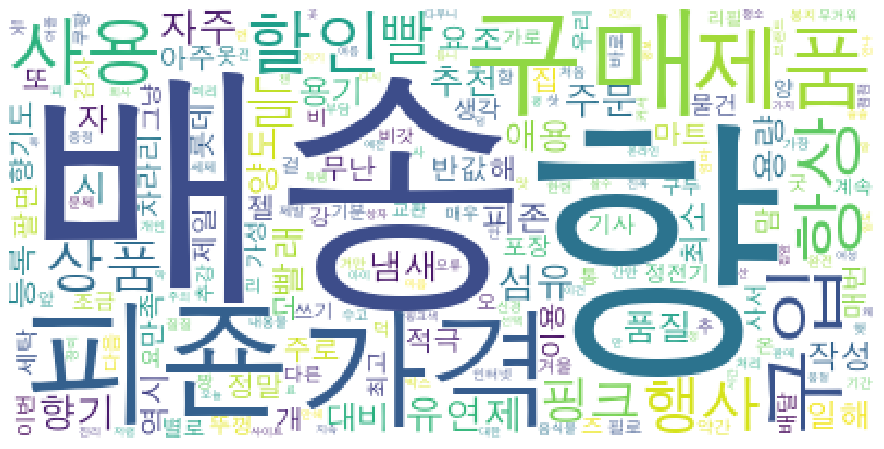

In [24]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path="AppleGothic",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()